In [1]:
import sys
# sys.path.insert(0,'C:/Users/annal/OneDrive/Documents/python3.8/pygplates_rev28_python38_win64')
# sys.path.insert(0,'/Users/omer/Documents/pygplates_rev18_python27_MacOS64')
sys.path.insert(0,'/Users/omer/Documents/pygplates_rev28_python38_MacOS64/')
sys.path.insert(1,'/Applications/GMT-6.0.0.app/Contents/Resources')

In [2]:
import pygplates
import numpy as np
import os
import math
import sphere_tools as sph
import matplotlib.pyplot as plt
import itertools
from scipy import stats
import statsmodels
import sys
from call_system_command import call_system_command
from matplotlib.lines import Line2D


%matplotlib inline

# BELOW FOR M21

In [ ]:
def get_volcanic_product_long_lat(rotations,anchor_plate_id,age,window,point_features):
    
    agemax = age+window
    agemin = age-window
    
    Xr = []
    Yr = []

    for p in point_features:
        
        # NB valid_time is a tuple, we take the first value since this is the 'birth' time of the LIP
        BirthTime = p.get_valid_time()[0] 
        
        if BirthTime <= agemax and BirthTime > agemin:
            
            PlateID = p.get_reconstruction_plate_id()

            # Get rotation for the point and reconstruct to its birth time if it's in age interval (window)
            LIP_rotation = rotations.get_rotation(age, PlateID, anchor_plate_id)

            reconstructed_point = LIP_rotation * p.get_geometry()
            reconstructed_point_degrees = reconstructed_point.to_lat_lon_point()

            Xr.append(reconstructed_point_degrees.get_longitude())
            Yr.append(reconstructed_point_degrees.get_latitude())
    
    
    return Xr, Yr


recon_label = 'M21'

basedir='/Users/omer/Documents/Programming/PyGplates/Supplement/Reconstructions/M21/'
input_rotation_filename1 = '%s/1000_0_rotfile_Merdith_et_al.rot' % basedir
rotation_model = pygplates.RotationModel([input_rotation_filename1])

ANCHOR_ID = int(0)
randomLons = []
randomLats = []

# Start with an empty list of features
features_to_modify = []
new_features=[]

cratonFileDir='/Users/omer/Documents/Programming/PyGplates/Supplement/Reconstructions/M21/'
cratonFile=cratonFileDir+"shapes_cratons_Merdith_et_al.gpml"

cratons = pygplates.FeatureCollection(cratonFile)    

reconstructed_feature_geometries=[]
# pygplates.reconstruct(cratons, rotation_model, reconstructed_feature_geometries, 0)
LIP_File='/Volumes/Accelsior4M2/ada2/KimberlitesReconstructed/Tappe-et-al-2018-EPSL-Kimberlite_emplacement_ages-automatic-part1-with-locations-with-plate-IDs.gpml'


pc = pygplates.FeatureCollection(LIP_File)
new_featuresALL=[]
window=10
for age in np.arange(200,0,-20,dtype='int'):
    agemax = age+window
    agemin = age-window
    
    count = 0
    age=int(age)
    new_features=[]
    ALLPoints_Lats=[]
    ALLPoints_Lons=[]
    for p in pc:
        
        BirthTime = p.get_valid_time()[0] 
        
        if BirthTime <= agemax and BirthTime > agemin:
#             print(BirthTime,age)
#             print(p.get_name())
            count+=1
            PlateID = p.get_reconstruction_plate_id()
            PlateID=int(PlateID)
            Name=p.get_name()
#             print(PlateID)
            # Get rotation for the point and reconstruct to its birth time if it's in age interval (window)
            LIP_rotation = rotation_model.get_rotation(age, PlateID, ANCHOR_ID)
            
            reconstructed_point = LIP_rotation * p.get_geometry()
            reconstructed_point_degrees = reconstructed_point.to_lat_lon_point()

            Xr=reconstructed_point_degrees.get_longitude()
            Yr=reconstructed_point_degrees.get_latitude()
    
            
#             point_lons, point_lats = get_volcanic_product_long_lat(rotation_model,ANCHOR_ID,age,window,pc)
            ALLPoints_Lats=np.append(ALLPoints_Lats,Yr)
            ALLPoints_Lons=np.append(ALLPoints_Lons,Xr)
#             totalRandomInsideCratons=totalRandomInsideCratons+1
            cF=pygplates.Feature()
            cF.set_geometry(reconstructed_point)
            cF.set_name(Name)
#             cF.set_reconstruction_plate_id(PlateID)
            new_features.append(cF)
            new_featuresALL.append(cF)
            
    a=np.column_stack((ALLPoints_Lons,ALLPoints_Lats))
    b=np.column_stack((a,np.ones(len(ALLPoints_Lats))*age))
    np.savetxt("Kimberlites_"+str(count)+"_Points_onCratons_"+str(age)+"_Ma-M21-with-Age.xyz",b)
    np.savetxt("Kimberlites_"+str(age)+"_Ma-M21-with-Age.xyz",b)
    np.savetxt("Kimberlites_"+str(count)+"_Points_onCratons_"+str(age)+"_Ma-M21-onlyCoords.xyz",a)
    output_feature_collection = pygplates.FeatureCollection(new_features)
    output_feature_collection.write("Kimberlites_"+str(count)+"_Points_onCratons_"+str(age)+"_Ma-M21.gpml")

# output_feature_collection = pygplates.FeatureCollection(new_featuresALL)
# output_feature_collection.write("Kimberlites_Reconstructed-200Ma-M21.gpml")





# BELOW FOR CASE 4

In [4]:
def get_volcanic_product_long_lat(rotations,anchor_plate_id,age,window,point_features):
    
    agemax = age+window
    agemin = age-window
    
    Xr = []
    Yr = []

    for p in point_features:
        
        # NB valid_time is a tuple, we take the first value since this is the 'birth' time of the LIP
        BirthTime = p.get_valid_time()[0] 
        
        if BirthTime <= agemax and BirthTime > agemin:
            
            PlateID = p.get_reconstruction_plate_id()

            # Get rotation for the point and reconstruct to its birth time if it's in age interval (window)
            LIP_rotation = rotations.get_rotation(age, PlateID, anchor_plate_id)

            reconstructed_point = LIP_rotation * p.get_geometry()
            reconstructed_point_degrees = reconstructed_point.to_lat_lon_point()

            Xr.append(reconstructed_point_degrees.get_longitude())
            Yr.append(reconstructed_point_degrees.get_latitude())
    
    
    return Xr, Yr


Recon_label = 'M21-NNR'
ReconstructionDir='/Users/omer/Desktop/NatGeoReviews/Reconstruction_Models/M21NNR/'
cratonFile=ReconstructionDir+"shapes_cratons_Merdith_et_al.gpml"
cratons = pygplates.FeatureCollection(cratonFile)    

input_rotation_filename1 = '%s/1000-410_rotations-NNR.rot' % ReconstructionDir
input_rotation_filename2 = '%s/Global_EB_410-250Ma_GK07_2017-NNR.rot' % ReconstructionDir
input_rotation_filename3 = '%s/Global_EB_250-0Ma_GK07_2017-NNR.rot' % ReconstructionDir
input_rotation_filename4 = '%s/NR_0Ma_1000Ma_for_gplates.rot' % ReconstructionDir
rotation_model = pygplates.RotationModel([input_rotation_filename1,input_rotation_filename2,\
                                          input_rotation_filename3,input_rotation_filename4],default_anchor_plate_id=5)

ANCHOR_ID = int(5)

randomLons = []
randomLats = []

# Start with an empty list of features
features_to_modify = []
new_features=[]

# cratonFileDir='/Users/omer/Documents/Programming/PyGplates/Supplement/Reconstructions/M21NNR/Cratons2017NNR/'
# cratonFile=cratonFileDir+"shapes_cratons_Merdith_et_al.gpml"

# cratons = pygplates.FeatureCollection(cratonFile)    

reconstructed_feature_geometries=[]
# pygplates.reconstruct(cratons, rotation_model, reconstructed_feature_geometries, 0)
LIP_File='/Volumes/Accelsior4M2/ada2/KimberlitesReconstructed/Tappe-et-al-2018-EPSL-Kimberlite_emplacement_ages-automatic-part1-with-locations-with-plate-IDs.gpml'


pc = pygplates.FeatureCollection(LIP_File)
new_featuresALL=[]
window=10
for age in np.arange(200,0,-20,dtype='int'):
    agemax = age+window
    agemin = age-window
    
    count = 0
    age=int(age)
    new_features=[]
    ALLPoints_Lats=[]
    ALLPoints_Lons=[]
    for p in pc:
        
        BirthTime = p.get_valid_time()[0] 
        
        if BirthTime <= agemax and BirthTime > agemin:
#             print(BirthTime,age)
#             print(p.get_name())
            count+=1
            PlateID = p.get_reconstruction_plate_id()
            PlateID=int(PlateID)
            Name=p.get_name()
#             print(PlateID)
            # Get rotation for the point and reconstruct to its birth time if it's in age interval (window)
            LIP_rotation = rotation_model.get_rotation(age, PlateID )
            
            reconstructed_point = LIP_rotation * p.get_geometry()
            reconstructed_point_degrees = reconstructed_point.to_lat_lon_point()

            Xr=reconstructed_point_degrees.get_longitude()
            Yr=reconstructed_point_degrees.get_latitude()
    
            
#             point_lons, point_lats = get_volcanic_product_long_lat(rotation_model,ANCHOR_ID,age,window,pc)
            ALLPoints_Lats=np.append(ALLPoints_Lats,Yr)
            ALLPoints_Lons=np.append(ALLPoints_Lons,Xr)
#             totalRandomInsideCratons=totalRandomInsideCratons+1
            cF=pygplates.Feature()
            cF.set_geometry(reconstructed_point)
            cF.set_name(Name)
#             cF.set_reconstruction_plate_id(PlateID)
            new_features.append(cF)
            new_featuresALL.append(cF)
            
    a=np.column_stack((ALLPoints_Lons,ALLPoints_Lats))
    b=np.column_stack((a,np.ones(len(ALLPoints_Lats))*age))
    np.savetxt("Kimberlites_"+str(count)+"_Points_onCratons_"+str(age)+"_Ma-M21-NNR-Case4-with-Age.xyz",b)
    np.savetxt("Kimberlites_"+str(age)+"_Ma-M21-with-Age.xyz",b)
    np.savetxt("Kimberlites_"+str(count)+"_Points_onCratons_"+str(age)+"_Ma-M21-NNR-Case4-onlyCoords.xyz",a)
    output_feature_collection = pygplates.FeatureCollection(new_features)
    output_feature_collection.write("Kimberlites_"+str(count)+"_Points_onCratons_"+str(age)+"_Ma-M21-NNR-Case4.gpml")

# output_feature_collection = pygplates.FeatureCollection(new_featuresALL)
# output_feature_collection.write("Kimberlites_Reconstructed-200Ma-M21.gpml")





In [15]:
import pandas as pd
import geopandas
import geoplot
import geoplot.crs as gcrs


# Depleted Kimberlites in Present Day

<ipython-input-82-b58a6630e4af>:27: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  axes.outline_patch.set_visible(True)


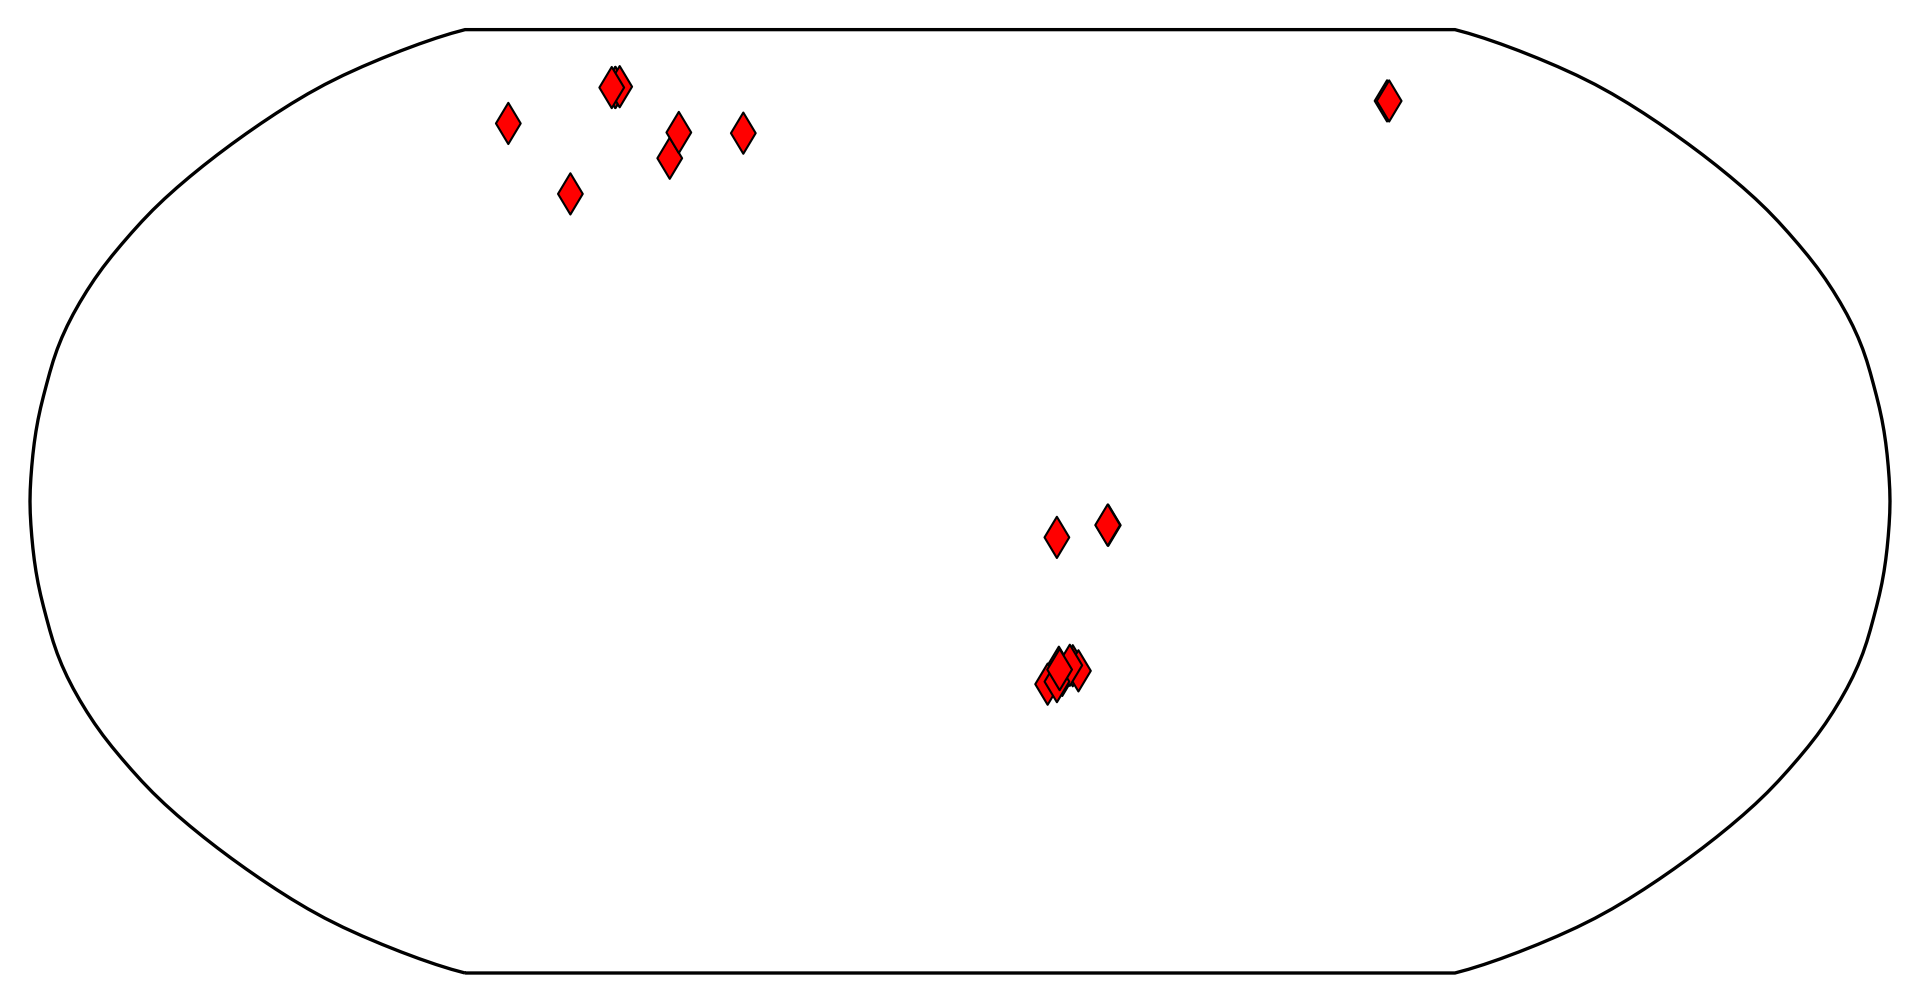

In [82]:
#### DEPLETED KIMBERLITES



dfDepletedKimberlites = pd.read_csv("/Users/omer/Documents/Data_Tomography_Geology/Kimberlites/\
Depleted-Kimberlites-Giuliani-et-al-2021.csv",
    skiprows=1,
    sep=',')
dfDepletedKimberlites

dfDepletedKimbGeoPandasDataFrame = geopandas.GeoDataFrame(
        dfDepletedKimberlites, geometry=geopandas.points_from_xy(dfDepletedKimberlites.Longitude, 
                                                                  dfDepletedKimberlites.Latitude),crs='EPSG:4326')


dfDepletedKimbGeoPandasDataFrame['LOCATION']='('+dfDepletedKimbGeoPandasDataFrame.Latitude.map(str) + ' ' + dfDepletedKimbGeoPandasDataFrame['Longitude'].map(str)+')'
dfDepletedKimbGeoPandasDataFrame=dfDepletedKimbGeoPandasDataFrame.drop(['Longitude','Latitude'],axis=1)

# dfDepletedKimbGeoPandasDataFrame
geoplot.pointplot(dfDepletedKimbGeoPandasDataFrame, projection=gcrs.Robinson(),
                  color='red',s=7,marker='d',edgecolor='black',linewidth=0.5)



axes=plt.gca()
axes.set_global() 
axes.outline_patch.set_visible(True)
axes.figure.dpi=300

# # plt.savefig('Fig4_28April2021.pdf',dpi=600)
# # plt.savefig('Fig4_28April2021.png',dpi=600)
plt.show()



In [83]:
Lons=dfDepletedKimberlites.Longitude[:]
Lats=dfDepletedKimberlites.Latitude[:]
DepKimbsCoords=np.column_stack((Lons,Lats))
# DepKimbsCoords
np.savetxt("Depleted_Kimberlites_Compilation.gmt",DepKimbsCoords)
np.savetxt("Depleted_Kimberlites_Compilation_Ages.txt",dfDepletedKimberlites.AgeG[:])



In [84]:
# Load a GMT file (instead of manually reading a '.txt' file line-by-line).
point_features = pygplates.FeatureCollection("Depleted_Kimberlites_Compilation.gmt")


Recon_label = 'M21-NNR'
ReconstructionDir='/Users/omer/Desktop/NatGeoReviews/Reconstruction_Models/M21NNR/'
cratonFile=ReconstructionDir+"shapes_cratons_Merdith_et_al.gpml"
cratons = pygplates.FeatureCollection(cratonFile)    

input_rotation_filename1 = '%s/1000-410_rotations-NNR.rot' % ReconstructionDir
input_rotation_filename2 = '%s/Global_EB_410-250Ma_GK07_2017-NNR.rot' % ReconstructionDir
input_rotation_filename3 = '%s/Global_EB_250-0Ma_GK07_2017-NNR.rot' % ReconstructionDir
input_rotation_filename4 = '%s/NR_0Ma_1000Ma_for_gplates.rot' % ReconstructionDir
rotation_model = pygplates.RotationModel([input_rotation_filename1,input_rotation_filename2,\
                                          input_rotation_filename3,input_rotation_filename4],default_anchor_plate_id=5)

ANCHOR_ID = int(0)



# Use the static polygons to assign plate IDs and valid time periods.
# Each point feature is partitioned into one of the static polygons and assigned its
# reconstruction plate ID and valid time period.
assigned_point_features = pygplates.partition_into_plates(
    cratonFile,
    rotation_model,
    point_features,
    properties_to_copy = [
        pygplates.PartitionProperty.reconstruction_plate_id,
        pygplates.PartitionProperty.valid_time_period])


output_points_filename="Depleted_Kimberlites_in_GPlates.gpml"
# Write the assigned point features to the output GPML file (ready for use in GPlates).
assigned_point_feature_collection = pygplates.FeatureCollection(assigned_point_features)
assigned_point_feature_collection.write(output_points_filename)



# Reconstruct Kimbs

In [88]:
def get_volcanic_product_long_lat(rotations,anchor_plate_id,age,window,point_features):
    
    agemax = age+window
    agemin = age-window
    
    Xr = []
    Yr = []

    for p in point_features:
        
        # NB valid_time is a tuple, we take the first value since this is the 'birth' time of the LIP
        BirthTime = p.get_valid_time()[0] 
        
        if BirthTime <= agemax and BirthTime > agemin:
            
            PlateID = p.get_reconstruction_plate_id()

            # Get rotation for the point and reconstruct to its birth time if it's in age interval (window)
            LIP_rotation = rotations.get_rotation(age, PlateID, anchor_plate_id)

            reconstructed_point = LIP_rotation * p.get_geometry()
            reconstructed_point_degrees = reconstructed_point.to_lat_lon_point()

            Xr.append(reconstructed_point_degrees.get_longitude())
            Yr.append(reconstructed_point_degrees.get_latitude())
    
    
    return Xr, Yr


Recon_label = 'M21-NNR'
ReconstructionDir='/Users/omer/Desktop/NatGeoReviews/Reconstruction_Models/M21NNR/'
cratonFile=ReconstructionDir+"shapes_cratons_Merdith_et_al.gpml"
cratons = pygplates.FeatureCollection(cratonFile)    

input_rotation_filename1 = '%s/1000-410_rotations-NNR.rot' % ReconstructionDir
input_rotation_filename2 = '%s/Global_EB_410-250Ma_GK07_2017-NNR.rot' % ReconstructionDir
input_rotation_filename3 = '%s/Global_EB_250-0Ma_GK07_2017-NNR.rot' % ReconstructionDir
input_rotation_filename4 = '%s/NR_0Ma_1000Ma_for_gplates.rot' % ReconstructionDir
rotation_model = pygplates.RotationModel([input_rotation_filename1,input_rotation_filename2,\
                                          input_rotation_filename3,input_rotation_filename4],default_anchor_plate_id=5)

ANCHOR_ID = int(0)

randomLons = []
randomLats = []

# Start with an empty list of features
features_to_modify = []
new_features=[]

# cratonFileDir='/Users/omer/Documents/Programming/PyGplates/Supplement/Reconstructions/M21NNR/Cratons2017NNR/'
# cratonFile=cratonFileDir+"shapes_cratons_Merdith_et_al.gpml"

# cratons = pygplates.FeatureCollection(cratonFile)    

reconstructed_feature_geometries=[]
# pygplates.reconstruct(cratons, rotation_model, reconstructed_feature_geometries, 0)
# LIP_File='/Volumes/Accelsior4M2/ada2/KimberlitesReconstructed/Tappe-et-al-2018-EPSL-Kimberlite_emplacement_ages-automatic-part1-with-locations-with-plate-IDs.gpml'
LIP_File='Depleted_Kimberlites_in_GPlates.gpml'




pc = pygplates.FeatureCollection(LIP_File)
new_featuresALL=[]
window=10
FullALLPoints_Lats=[]
FullALLPoints_Lons=[]
for age in np.arange(200,0,-20,dtype='int'):
    agemax = age+window
    agemin = age-window
    
    count = 0
    age=int(age)
    new_features=[]
    ALLPoints_Lats=[]
    ALLPoints_Lons=[]
    COUNTKimb=0
    for p in pc:
        
#         BirthTime = p.get_valid_time()[0] 
        BirthTime=dfDepletedKimberlites.AgeG[COUNTKimb]
        
        if BirthTime <= agemax and BirthTime > agemin:
#             print(BirthTime,age)
#             print(p.get_name())
            count+=1
            PlateID = p.get_reconstruction_plate_id()
            PlateID=int(PlateID)
            Name=p.get_name()
#             print(PlateID)
            # Get rotation for the point and reconstruct to its birth time if it's in age interval (window)
            LIP_rotation = rotation_model.get_rotation(age, PlateID, anchor_plate_id=int(0))
            
            reconstructed_point = LIP_rotation * p.get_geometry()
            reconstructed_point_degrees = reconstructed_point.to_lat_lon_point()

            Xr=reconstructed_point_degrees.get_longitude()
            Yr=reconstructed_point_degrees.get_latitude()
    
            
#             point_lons, point_lats = get_volcanic_product_long_lat(rotation_model,ANCHOR_ID,age,window,pc)
            ALLPoints_Lats=np.append(ALLPoints_Lats,Yr)
            ALLPoints_Lons=np.append(ALLPoints_Lons,Xr)
            FullALLPoints_Lats=np.append(FullALLPoints_Lats,Yr)
            FullALLPoints_Lons=np.append(FullALLPoints_Lons,Xr)
#             totalRandomInsideCratons=totalRandomInsideCratons+1
            cF=pygplates.Feature()
            cF.set_geometry(reconstructed_point)
            cF.set_name(Name)
#             cF.set_reconstruction_plate_id(PlateID)
            new_features.append(cF)
            new_featuresALL.append(cF)
        COUNTKimb=COUNTKimb+1   
    
    a=np.column_stack((ALLPoints_Lons,ALLPoints_Lats))
    b=np.column_stack((a,np.ones(len(ALLPoints_Lats))*age))
    np.savetxt("Depleted_Kimberlites_Reconstructed_"+str(age)+"_Ma-M21-NNR-with-Age.xyz",b)
#     np.savetxt("Kimberlites_"+str(age)+"_Ma-M21-with-Age.xyz",b)
    np.savetxt("Depleted_Kimberlites_Reconstructed_"+str(age)+"_Ma-M21-NNR-OnlyCoords.xy",a)

AA=np.column_stack((FullALLPoints_Lons,FullALLPoints_Lats))    
np.savetxt("ALLDepleted_Kimberlites_Reconstructed-M21-NNR-OnlyCoords.xy",AA)



#     output_feature_collection = pygplates.FeatureCollection(new_features)
#     output_feature_collection.write("Kimberlites_"+str(count)+"_Points_onCratons_"+str(age)+"_Ma-M21-NNR-Case4.gpml")

# # output_feature_collection = pygplates.FeatureCollection(new_featuresALL)
# output_feature_collection.write("Kimberlites_Reconstructed-200Ma-M21.gpml")





In [87]:
a

array([], shape=(0, 2), dtype=float64)

# Depleted Kimberlites - Reconstructed - M21-NNR

<ipython-input-93-8a54eb4df3a2>:27: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  axes.outline_patch.set_visible(True)


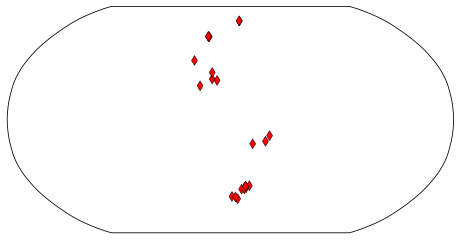

In [93]:
#### DEPLETED KIMBERLITES

plt.close()
# for age in np.arange(180,20,-20,dtype='int'):
    


dfDepletedKimberlites = pd.read_csv("ALLDepleted_Kimberlites_Reconstructed-M21-NNR-OnlyCoords.xy",
    skiprows=0,names=["Longitude","Latitude"],sep=' ')

#     dfDepletedKimberlites

dfDepletedKimbGeoPandasDataFrame = geopandas.GeoDataFrame(
        dfDepletedKimberlites, geometry=geopandas.points_from_xy(dfDepletedKimberlites.Longitude, 
                                                                  dfDepletedKimberlites.Latitude),crs='EPSG:4326')


dfDepletedKimbGeoPandasDataFrame['LOCATION']='('+dfDepletedKimbGeoPandasDataFrame.Latitude.map(str) + ' ' + dfDepletedKimbGeoPandasDataFrame['Longitude'].map(str)+')'
dfDepletedKimbGeoPandasDataFrame=dfDepletedKimbGeoPandasDataFrame.drop(['Longitude','Latitude'],axis=1)

# dfDepletedKimbGeoPandasDataFrame
geoplot.pointplot(dfDepletedKimbGeoPandasDataFrame, projection=gcrs.Robinson(),
                  color='red',s=7,marker='d',edgecolor='black',linewidth=0.5)

axes=plt.gca()
axes.set_global() 
axes.outline_patch.set_visible(True)



ax.figure.dpi=300

# # plt.savefig('Fig4_28April2021.pdf',dpi=600)
plt.savefig('Fig4_22Aug2022-DepKimbsPlot.pdf',dpi=300)
# plt.show()




In [90]:
dfDepletedKimberlites

,Longitude,Latitude
0,-31.070572,24.079943
1,-37.768678,42.155676
2,-21.265455,28.925560
3,-21.450231,33.559116
4,4.479519,72.676673
5,-17.119249,27.910046
6,4.119562,72.824823
7,-27.911054,59.829746
8,-27.940263,59.833474
9,-27.296946,59.735924
